# Topic analysis

## Initialization

In [1]:
import pandas as pd
import numpy as np
import ast
from collections import Counter
import matplotlib.pyplot as plt
import textwrap
import seaborn as sns
import math
import os

In [ ]:
PATH_DIR = './'
os.chdir(PATH_DIR)

In [2]:
# Dataset with the tweets
PATH = 'Data/Original dataset 11-2022/'
FILE_NAME = 'tweets_with_topics'
df_tweets = pd.read_excel(PATH+FILE_NAME+'.xlsx', engine='openpyxl')

In [4]:
def evaluate_string(x):
    try:
        return ast.literal_eval(x)
    except:
        return x

df_tweets['topics_list'] = df_tweets['topics_list'].apply(lambda x: evaluate_string(x))
df_tweets['topics_list_general'] = df_tweets['topics_list_general'].apply(lambda x: evaluate_string(x))
df_tweets['topics_list_specific'] = df_tweets['topics_list_specific'].apply(lambda x: evaluate_string(x))

In [5]:
# Datasets with the clustered users
PATH = 'Data/Original dataset 11-2022/'
FILE_NAME = 'clustered_users_'

df_users = {}

for i in range(4):
    df_users[str(i)] = pd.read_excel(PATH+FILE_NAME+str(i)+'.xlsx')

In [6]:
# tweets per cluster
df_tweets_clusters = {}

for i in range(4):
    df_tweets_clusters[str(i)] = df_tweets.loc[df_tweets['user_id'].isin(df_users[str(i)]['user_id'].values.astype(list))]

In [7]:
df_tweets.head()

,Unnamed: 0.1,Unnamed: 0,tweet_id,user_id,text,created_at,in_reply_to_status_id,in_reply_to_user_id,quote_count,reply_count,...,tokenized_text,stemmed_text,hashtags,emojis,smileys,numbers,urls,topics_list,topics_list_general,topics_list_specific
0,0,0,1587232917985512960,1340915697384209920,RT @sergioisbetter: ‼️‼️💚SALE ENDING SOON💚‼️‼️...,Mon Oct 31 23:59:51 +0000 2022,NaN,NaN,0,0,...,NaN,NaN,[],[],[],[],[],"{'Topics': [0, 6, 22, 28, 33], 'Scores': [0.02...","{'Topics': ['Social Media', 'Finance', 'Genera...","{'Topics': ['Contest Participation', 'Cryptocu..."
1,1,1,1586896938363802112,1113923052084113024,‼️‼️💚SALE ENDING SOON💚‼️‼️\nWatch our latest h...,Mon Oct 31 01:44:47 +0000 2022,NaN,NaN,2,10,...,$EMOJI$SALE ENDING SOON$EMOJI$Watch our latest...,sale end soon watch latest hottest collab new...,[],"['💚', '💚']",[],[],"['https://t.co/kGpSdd3HUR', 'https://t.co/MPkU...","{'Topics': [0, 6, 22, 28, 33], 'Scores': [0.02...","{'Topics': ['Social Media', 'Finance', 'Genera...","{'Topics': ['Contest Participation', 'Cryptocu..."
2,2,2,1587232917947929088,768539405472542720,Now playing: WJIC Network ID by The WJIC Netwo...,Mon Oct 31 23:59:51 +0000 2022,NaN,NaN,0,0,...,Now playing: WJIC Network ID by The WJIC Netwo...,play wjic network id wjic network listen live,[],[],[],[],['https://t.co/Lzezf1IpOn'],"{'Topics': [0, 2, 4, 5, 6, 8, 10, 15, 16, 18, ...","{'Topics': ['Social Media', 'Entertainment', '...","{'Topics': ['Contest Participation', 'Music', ..."
3,3,3,1587232917972999936,1582752440780313088,RT @Kyzef: Good morning mfers ☀️ Hope everybod...,Mon Oct 31 23:59:51 +0000 2022,NaN,NaN,0,0,...,NaN,NaN,[],[],[],[],[],"{'Topics': [1, 71, 72], 'Scores': [0.021520933...","{'Topics': ['General Expressions'], 'Scores': ...","{'Topics': ['Hope and Expectation'], 'Scores':..."
4,4,4,1587109985929945088,1262722155357199872,Good morning mfers ☀️ Hope everybody has a gre...,Mon Oct 31 15:51:22 +0000 2022,NaN,NaN,0,23,...,Good morning mfers $EMOJI$ Hope everybody has ...,good morn mfer hope everybodi great halloween,[],['☀'],[],[],[],"{'Topics': [1, 71, 72], 'Scores': [0.021520933...","{'Topics': ['General Expressions'], 'Scores': ...","{'Topics': ['Hope and Expectation'], 'Scores':..."


In [8]:
def topic_percentage(series):
    counter = dict(Counter([topic for row in series if (pd.isna(row) == False) for topic in row['Topics']]))
    # percentage = {str(topic): (count/df_tweets.shape[0]) for topic,count in counter.items()}
    percentage = {str(topic): (count/series.shape[0]) for topic,count in counter.items()}
    percentage = dict(sorted(percentage.items(), key=lambda item: item[1], reverse=True))
    return counter, percentage

def split_string(labels, n_char=13):
    labels_list = []
    
    for label in labels:
        if ('/' in label):
            label = label.replace('/', '/ ')
        labels_list.append(textwrap.fill(label, n_char, break_long_words=False))
    
    return labels_list

def create_plot(n):
    x = math.floor(math.sqrt(n))
    y = math.ceil(n/x)
    return plt.subplots(x, y, figsize=(15, 8))
    # return plt.subplots(1, n, figsize=(23, 4))

def label_color(labels, color_dict):
    colors = ['#66C5CCFF', '#FE88B1FF', '#F89C74FF', '#DCB0F2FF', '#8BE0A4FF', '#B497E7FF', '#FFCC66FF', '#6CC08BFF', '#68a4c7FF', '#d378e8FF', '#fb7f79', '#f0933d']
    color_list = []
    
    for label in labels:
        if (label not in color_dict.keys()):
            for color in colors:
                if (color not in color_dict.values()):
                    color_dict[label] = color
                    break
        color_list.append(color_dict[label])
    
    return color_dict, color_list

def visualize_percentage(percentages, title, subtitles):
    n = 5
    
    color_dict = {}
    
    fig, axis = create_plot(len(percentages))
    
    for ax, data, subtitle in zip(axis.flatten(), percentages, subtitles):
        labels = list(data.keys())[:n]
        values = list(data.values())[:n]
        
        color_dict, color_list = label_color(labels, color_dict)
    
        ax.bar(labels, values, color=color_list)
        ax.set_xticks(ticks= np.arange(n), labels=split_string(list(data.keys())[0:5]))
        ax.set_ylim(0, 0.65)
        ax.grid(axis='y', alpha=0.5)
        ax.set_title(subtitle, fontsize=11)
        ax.set_xlabel('Topics', fontsize=10)
        ax.set_ylabel('Percentage', fontsize=10)
        # ax.set_yticks(fontsize=8)
        # ax.set_xticks(fontsize=8)

        for i, (label, value) in enumerate(data.items()):
            if i < n:
                ax.annotate(f"{round(value,2)}", (i, value), ha='center', va='bottom', fontsize=9)

    fig.suptitle(title, fontsize= 12)
    fig.tight_layout()
    return plt.show()

def visualize_percentage_individual(percentage, title, n=4, fig_size=(5,3), y=1.0):
    labels = list(percentage.keys())[:n]
    values = list(percentage.values())[:n]

    colors = ['#66C5CCFF', '#FE88B1FF', '#F89C74FF', '#DCB0F2FF', '#8BE0A4FF', '#B497E7FF', '#FFCC66FF', '#6CC08BFF', '#68a4c7FF', '#d378e8FF', '#fb7f79', '#f0933d']
    
    plt.figure(figsize=fig_size)
    plt.bar(split_string(list(percentage.keys())[0:n]), values, color=colors)    
    plt.ylim(0, y)
    plt.grid(axis='y', alpha=0.5)
    plt.title(title, fontsize=11)
    plt.xlabel('Clusters', fontsize=10)
    plt.ylabel('Percentage', fontsize=10)
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)

    for i, (label, value) in enumerate(percentage.items()):
        if i < n:
            plt.annotate(f"{round(value,3)}", (i, value), ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    return plt.show()

def visualize_percentage_individual_2(percentage, title, n=4, fig_size=(5,3), y=1.0):
    labels = list(percentage.keys())[:n]
    values = list(percentage.values())[:n]

    colors = ['#66C5CCFF', '#FE88B1FF', '#F89C74FF', '#DCB0F2FF', '#8BE0A4FF', '#B497E7FF', '#FFCC66FF', '#6CC08BFF', '#68a4c7FF', '#d378e8FF', '#fb7f79', '#f0933d']
    
    plt.figure(figsize=fig_size)
    plt.barh(range(0,n-1,1), values, color=colors)
    plt.yticks(range(0,n-1,1), split_string(list(percentage.keys())[0:n], n_char=18))
    plt.xlim(0, y)
    plt.grid(axis='x', alpha=0.5)
    plt.title(title, fontsize=11)
    plt.xlabel('Percentage', fontsize=10)
    plt.ylabel('Topics', fontsize=10)
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    
    for i, (label, value) in enumerate(percentage.items()):
        if i < n:
            plt.annotate(f"{round(value,3)}", (value+0.015, i+0.23), ha='center', va='bottom', fontsize=9)

    plt.gca().invert_yaxis()

    plt.tight_layout()
    return plt.show()

## Visualization

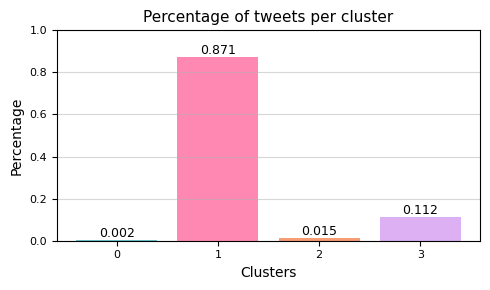

In [9]:
total_tweets = df_tweets.shape[0]
cluster_names = []
tweets_per_cluster = []
percentage_per_cluster = []
for i in range(4):
    cluster_names.append(str(i))
    tweets_per_cluster.append(df_tweets_clusters[str(i)].shape[0])
    percentage_per_cluster.append(round(tweets_per_cluster[i]/total_tweets,3))

data = {}
for cluster,tweets in zip(cluster_names,percentage_per_cluster):
    data[cluster] = tweets

visualize_percentage_individual(data, 'Percentage of tweets per cluster')

In [10]:
# Ratio of tweets per user
for i in range(4):
    num_users = df_tweets_clusters[str(i)]['user_id'].unique().size
    num_tweets = df_tweets_clusters[str(i)].shape[0]

    try:
        prc = num_tweets/num_users
    except:
        prc = 0.0
    
    print("Cluster",i, "-", prc)

Cluster 0 - 4.245901639344262
Cluster 1 - 1.1628046396455103
Cluster 2 - 1.318489289740699
Cluster 3 - 1.2141545416019213


In [11]:
# Distribution of the types of tweet
labels = []
res = []

for i in range(4):
    labels.append(str(i))
    aux_list = []
    for x in ['tweet', 'RT', 'QRT']:
        aux = df_tweets_clusters[str(i)].loc[df_tweets_clusters[str(i)]['type'] == x]
        num_users = aux['user_id'].size
        num_tweets = df_tweets_clusters[str(i)].shape[0]

        try:
            aux_list.append(num_users/num_tweets)
        except:
            aux_list.append(0.0)
    res.append(aux_list)

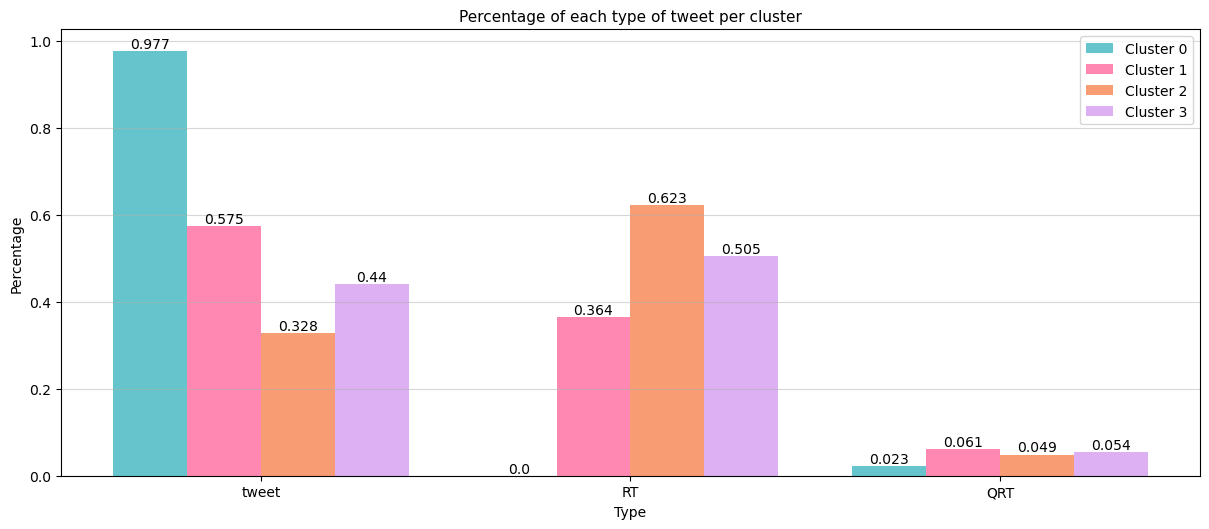

In [12]:
colors = ['#66C5CCFF', '#FE88B1FF', '#F89C74FF', '#DCB0F2FF', '#8BE0A4FF', '#B497E7FF', '#FFCC66FF', '#6CC08BFF', '#68a4c7FF', '#d378e8FF', '#fb7f79', '#f0933d']

labels = ['tweet', 'RT', 'QRT']
data = res
x = np.arange(len(res[0]))
width = 0.2

y = res[0]
z = res[1]
k = res[2]
p = res[3]

fig, ax = plt.subplots(figsize=(12,5))
ax.bar(x, y, width=width, color=colors[0], align='center', label='Cluster 0')
ax.bar(x+width, z, width=width, color=colors[1], align='center', label='Cluster 1')
ax.bar(x+(2*width), k, width=width, color=colors[2], align='center', label='Cluster 2')
ax.bar(x+(3*width), p, width=width, color=colors[3], align='center', label='Cluster 3')


ax.set_xticks(x + width + width/2)
ax.set_xticklabels(labels)

ax.legend()

for container,label in zip(ax.containers, data):
    ax.bar_label(container, labels=np.round(label,3))

fig.tight_layout()

plt.grid(axis='y', alpha=0.5)
plt.title('Percentage of each type of tweet per cluster', fontsize=11)
plt.xlabel('Type', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.show()

In [13]:
for i in range(4):
    freq_users = df_tweets_clusters[str(i)].groupby('user_id').count()['tweet_id'].sort_values(ascending=False)
    num_users = len(freq_users)
    total_tweets = df_tweets_clusters[str(i)].shape[0]

    for n in range(total_tweets):
        val = freq_users[:n].sum()
        if (val > total_tweets*0.9):
            print("Cluster", i)
            print("Percentage of users:", n/num_users)
            print("Percentage of tweets:", val/total_tweets)
            break


Cluster 0
Percentage of users: 0.6557377049180327
Percentage of tweets: 0.9073359073359073
Cluster 1
Percentage of users: 0.8837221425778704
Percentage of tweets: 0.9000022415996055
Cluster 2
Percentage of users: 0.8686583990980834
Percentage of tweets: 0.9003847798204361
Cluster 3
Percentage of users: 0.8786551772849273
Percentage of tweets: 0.9000581733566027


In [14]:
counter = {}
percentage = {}
general_counter = {}
general_percentage = {}
specific_counter = {}
specific_percentage = {}

for i in range(4):
    counter[str(i)], percentage[str(i)] = topic_percentage(df_tweets_clusters[str(i)]['topics_list'])
    general_counter[str(i)], general_percentage[str(i)] = topic_percentage(df_tweets_clusters[str(i)]['topics_list_general'])
    specific_counter[str(i)], specific_percentage[str(i)] = topic_percentage(df_tweets_clusters[str(i)]['topics_list_specific'])

In [15]:
specific_percentage_2 = {}

for key,val in specific_percentage.items():
    specific_percentage_2[key] = {}
    for label in val:
        if (label != 'KPop'):
            specific_percentage_2[key][label] = specific_percentage[key][label]

for key in specific_percentage_2.keys():
    specific_percentage_2[key] = dict(sorted(specific_percentage_2[key].items(), key=lambda item: item[1], reverse=True))

In [16]:
general_percentage_2 = {}

for key,val in general_percentage.items():
    general_percentage_2[key] = {}
    for label in val:
        if (label == 'General Expressions' or label == 'Other'):
            pass
        else:
            general_percentage_2[key][label] = general_percentage[key][label]

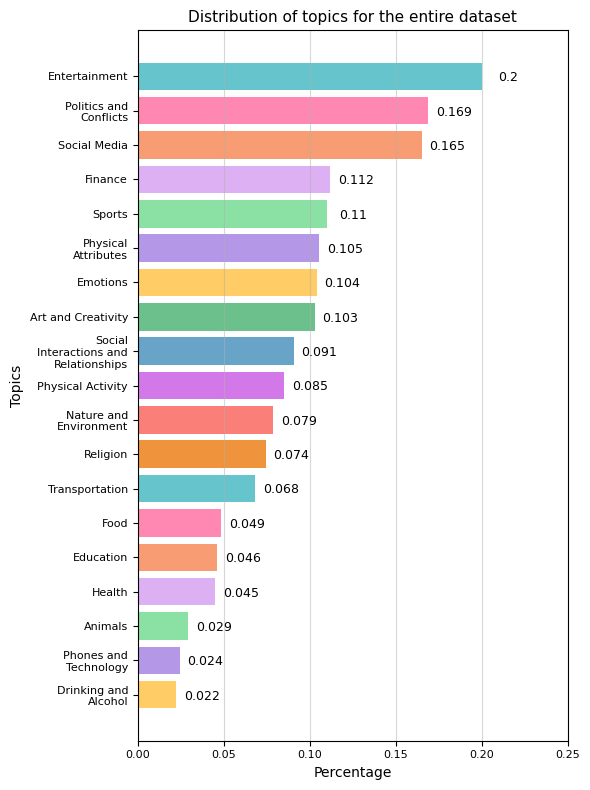

In [17]:
counter_all, percentage_all = topic_percentage(df_tweets['topics_list'])
general_counter_all, general_percentage_all = topic_percentage(df_tweets['topics_list_general'])
specific_counter_all, specific_percentage_all = topic_percentage(df_tweets['topics_list_specific'])

general_percentage_all_2 = {}

for key,val in general_percentage_all.items():
    if (key == 'General Expressions' or key == 'Other'):
        pass
    else:
        general_percentage_all_2[key] = general_percentage_all[key]
        
        
visualize_percentage_individual_2(general_percentage_all_2, 'Distribution of topics for the entire dataset', n=20, fig_size=(6,8), y=0.25)

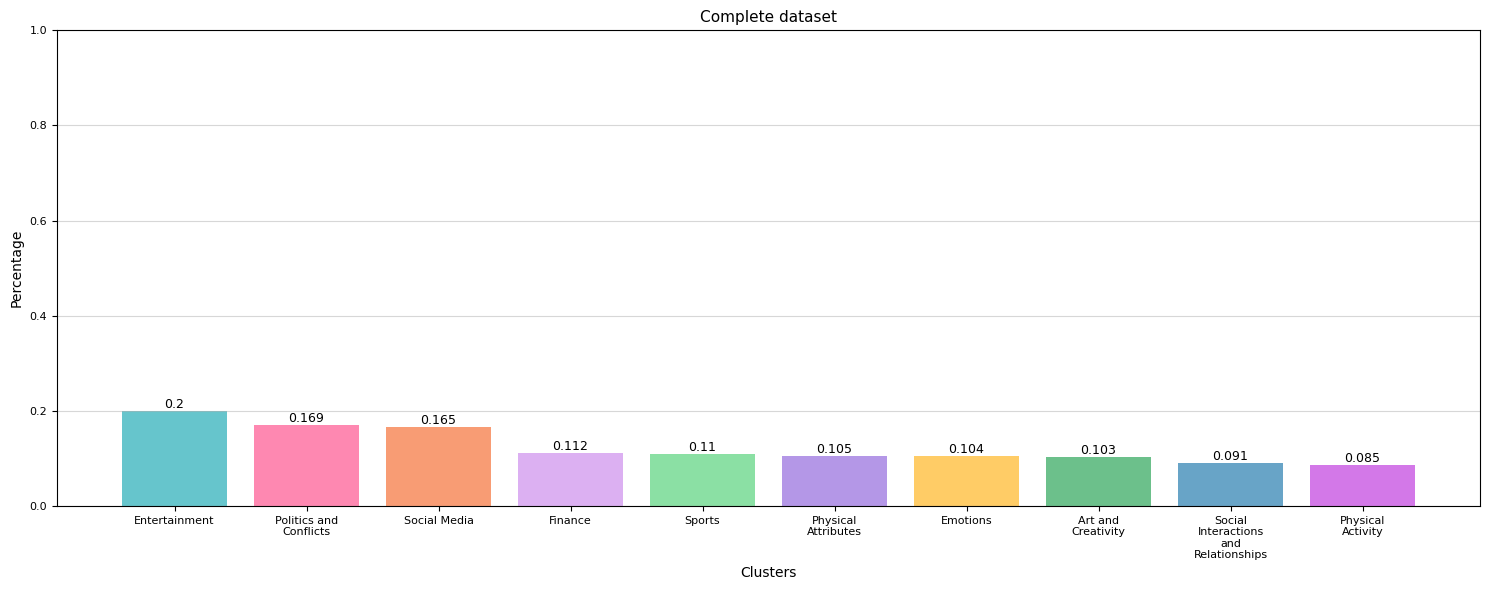

In [18]:
visualize_percentage_individual(general_percentage_all_2, 'Complete dataset', n=10, fig_size=(15,6))

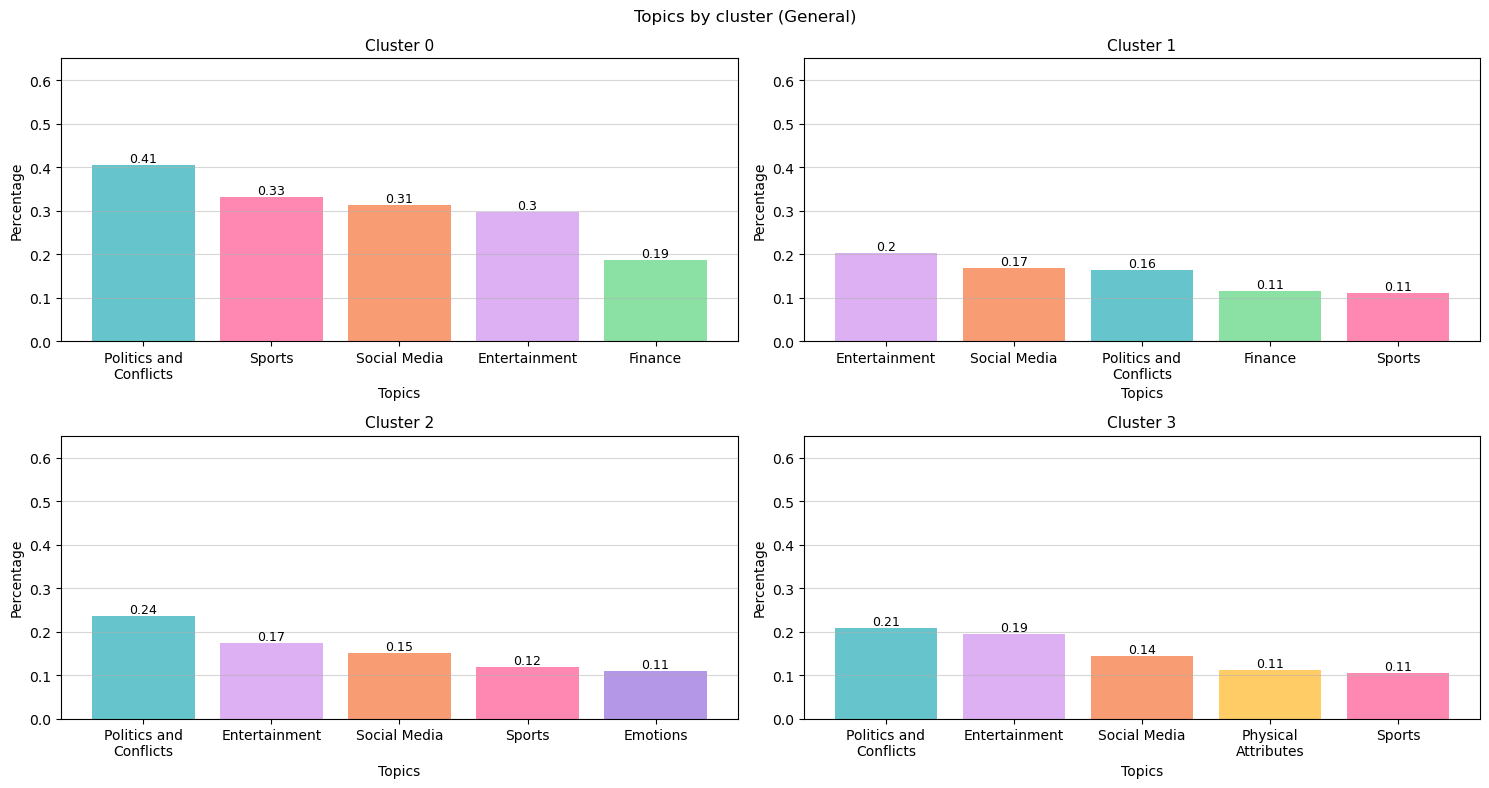

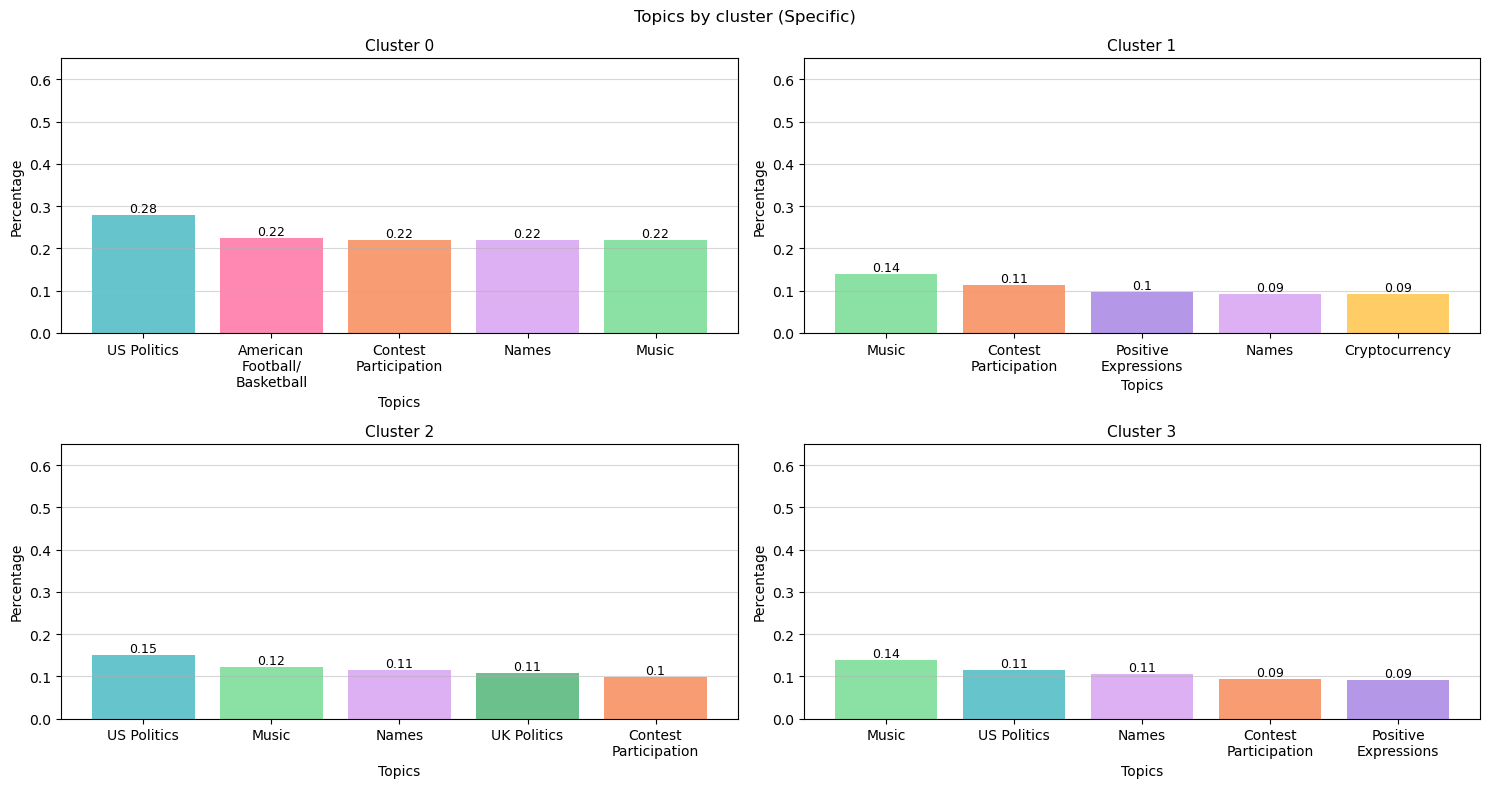

In [19]:
specific_percentages = [specific_percentage_2[str(cluster)] for cluster in range(4)]
general_percentages = [general_percentage_2[str(cluster)] for cluster in range(4)]

subtitles = ["Cluster "+str(cluster) for cluster in range(4)]

title1 = 'Topics by cluster (General)'
title2 = 'Topics by cluster (Specific)'

visualize_percentage(general_percentages, title1, subtitles)
visualize_percentage(specific_percentages, title2, subtitles)

## Correlations

In [13]:
def label_correlation(series):
    corr = {}
    for lista in [row['Topics'] for row in series if (pd.isna(row) == False)]:
        for i in range(len(lista)):
            if (lista[i] not in corr):
                corr[lista[i]] = {}
            for j in range(len(lista)):
                if (lista[j] not in corr[lista[i]]):
                    corr[lista[i]][lista[j]] = 0
                corr[lista[i]][lista[j]] += 1
    for key in corr.keys():
        corr[key] = dict(sorted(corr[key].items(), key=lambda item: item[1], reverse=True))
    
    percentage = {}
    for topic1,topic2 in corr.items():
        percentage[topic1] = {}
        for key,val in topic2.items():
            percentage[topic1][key] = val/topic2[topic1]
    
    return corr, percentage

corr, prc = label_correlation(df_tweets['topics_list_general'])

In [14]:
corr_df = pd.DataFrame(corr)
rows = corr_df.index.to_list()
corr_df = corr_df[rows]
corr_df

,Social Media,Other,General Expressions,Entertainment,Finance,Politics and Conflicts,Art and Creativity,Sports,Physical Activity,Transportation,...,Education,Nature and Environment,Social Interactions and Relationships,Emotions,Physical Attributes,Health,Phones and Technology,Food,Animals,Drinking and Alcohol
Social Media,25367,15344,15093,12413,10470,7947,5502,5332,4891,4540,...,4075,4043,3824,3620,3353,3310,2933,1628,1399,1257
Other,15344,51408,32215,20257,11556,17208,10938,10940,9955,8265,...,5680,10031,9139,8146,10879,5324,3003,4771,3479,2694
General Expressions,15093,32215,72390,18606,11953,17364,11516,11359,9689,7802,...,5431,9397,9072,10569,12626,5515,3222,5370,3487,2776
Entertainment,12413,20257,18606,30765,8249,10338,7940,7745,5863,4668,...,3891,5975,5360,5535,6465,3197,2591,2725,2279,1675
Finance,10470,11556,11953,8249,17163,6889,4450,3837,3576,4549,...,4334,4643,3006,2539,2895,2846,2695,1922,1178,1229
Politics and Conflicts,7947,17208,17364,10338,6889,25978,4679,6867,5209,4977,...,4161,6307,5974,5884,5389,5009,1644,2022,1792,1425
Art and Creativity,5502,10938,11516,7940,4450,4679,15799,2747,4401,2998,...,1837,4559,2963,2708,5497,2493,1659,2430,1822,1197
Sports,5332,10940,11359,7745,3837,6867,2747,16909,4087,3349,...,2114,2656,2470,3200,3347,1924,921,1261,1057,941
Physical Activity,4891,9955,9689,5863,3576,5209,4401,4087,13074,4227,...,1970,3498,3531,3053,3869,2017,1325,2171,1452,1448
Transportation,4540,8265,7802,4668,4549,4977,2998,3349,4227,10482,...,2302,3671,1991,1704,2314,2052,1373,1392,1176,921


In [21]:
corr_df2 = corr_df.corr()

threshold = 0.7
results = corr_df2.where(corr_df2 > threshold).stack().index.tolist()
print("\nThreshold =", threshold)

repeat = []

for x in results:
    cond = x[0] != x[1]
    cond *= x[0] not in ['Other', 'General Expressions']
    cond *= x[1] not in ['Other', 'General Expressions']
    cond *= x not in repeat
    
    if (cond == 1):
        repeat.append(x)
        repeat.append((x[1], x[0]))
        print(x, '//', corr_df2[x[1]][x[0]])
        print('')


Threshold = 0.7
('Social Media', 'Finance') // 0.7803773725597194

('Social Media', 'Phones and Technology') // 0.7035108367183917

('Finance', 'Education') // 0.7061182977943649

('Finance', 'Phones and Technology') // 0.7081933707440378

('Politics and Conflicts', 'Religion') // 0.7255404918588448



<Axes: >

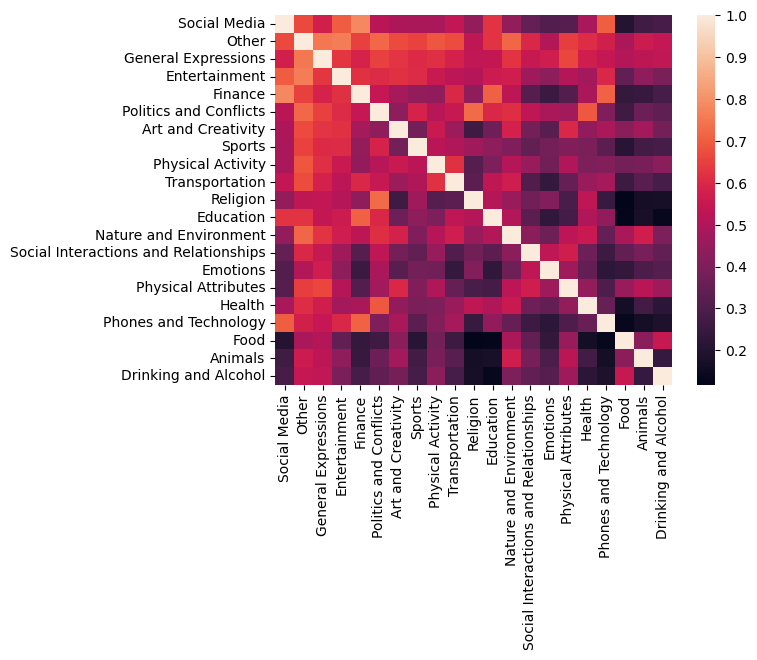

In [16]:
corr_df2 = corr_df.corr()

sns.heatmap(corr_df2, 
            xticklabels=corr_df2.columns.values,
            yticklabels=corr_df2.columns.values)